# Support Vector Machines with Python
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
%matplotlib inline

## Importing Inbuilt Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

This dataframe is in dictionary form

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df['cancer'] = pd.DataFrame(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Exploration

## Checking Column Descriptions

In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Checking Info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Checking Null values

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
cancer                     0
dtype: int64

## Checking for blank strings

In [12]:
np.where(df == " ")

C:\Users\aditi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(array([], dtype=int64), array([], dtype=int64))

## Checking value counts of target

In [13]:
df["cancer"].value_counts()

## means 1 is Benign
## and 0 is Malignant

1    357
0    212
Name: cancer, dtype: int64

In [14]:
# Class Distribution: 212 - Malignant, 357 - Benign
df['cancer'] = df.cancer.apply(lambda x: 0 if x == 1 else 1)
df.cancer.value_counts()

0    357
1    212
Name: cancer, dtype: int64

# Univariate Analysis

## Boxplots

Feature:  mean radius


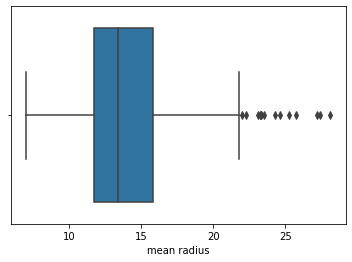

*****************************************************************************************************************************
Feature:  mean texture


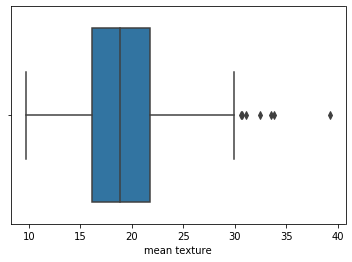

*****************************************************************************************************************************
Feature:  mean perimeter


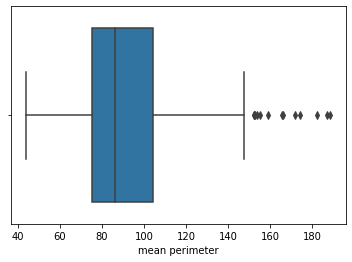

*****************************************************************************************************************************
Feature:  mean area


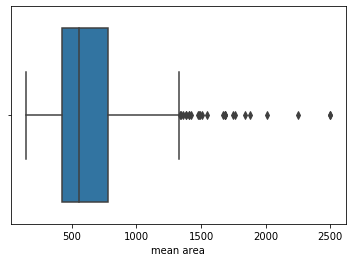

*****************************************************************************************************************************
Feature:  mean smoothness


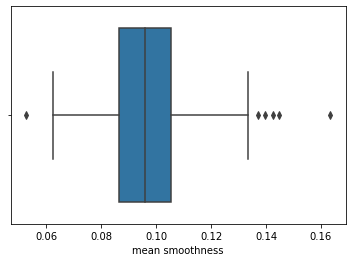

*****************************************************************************************************************************
Feature:  mean compactness


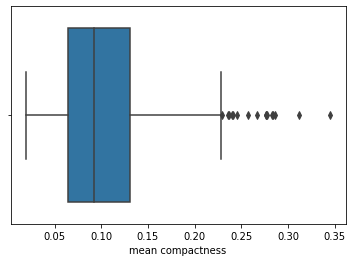

*****************************************************************************************************************************
Feature:  mean concavity


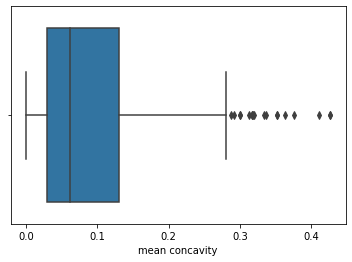

*****************************************************************************************************************************
Feature:  mean concave points


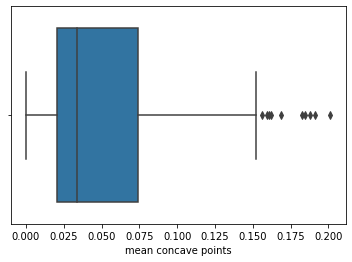

*****************************************************************************************************************************
Feature:  mean symmetry


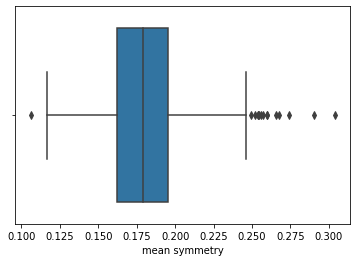

*****************************************************************************************************************************
Feature:  mean fractal dimension


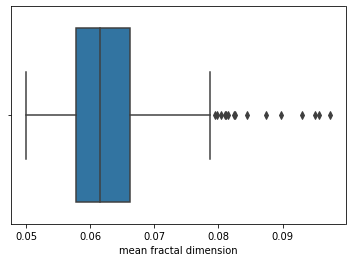

*****************************************************************************************************************************
Feature:  radius error


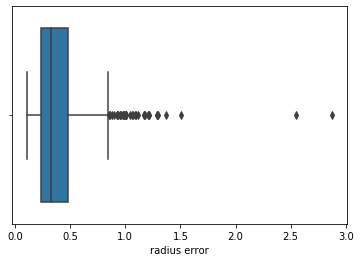

*****************************************************************************************************************************
Feature:  texture error


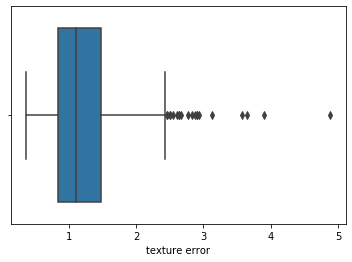

*****************************************************************************************************************************
Feature:  perimeter error


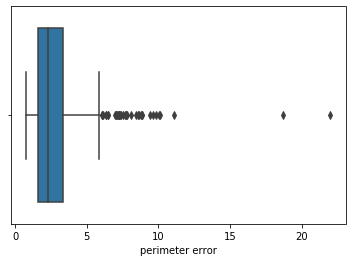

*****************************************************************************************************************************
Feature:  area error


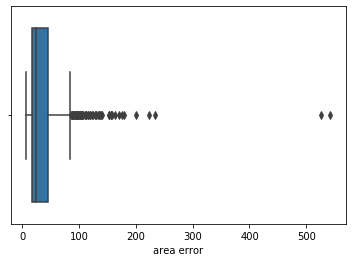

*****************************************************************************************************************************
Feature:  smoothness error


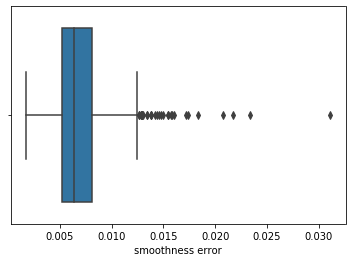

*****************************************************************************************************************************
Feature:  compactness error


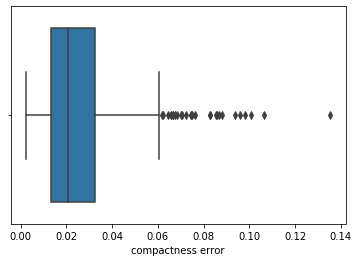

*****************************************************************************************************************************
Feature:  concavity error


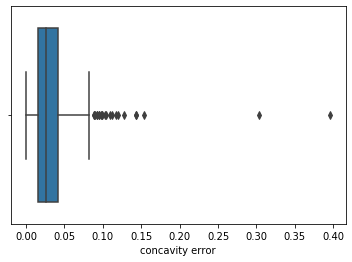

*****************************************************************************************************************************
Feature:  concave points error


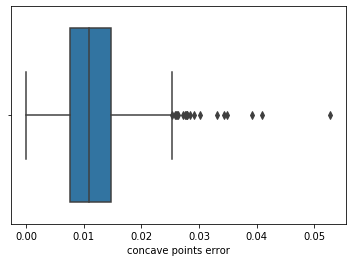

*****************************************************************************************************************************
Feature:  symmetry error


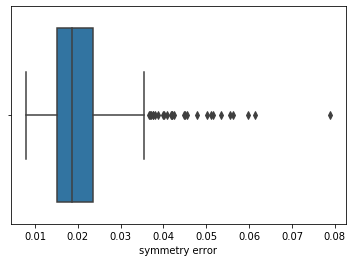

*****************************************************************************************************************************
Feature:  fractal dimension error


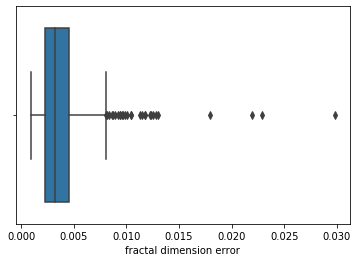

*****************************************************************************************************************************
Feature:  worst radius


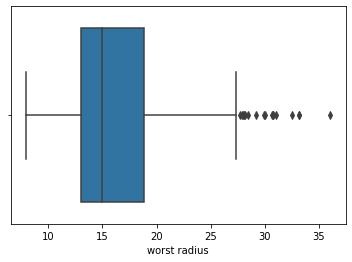

*****************************************************************************************************************************
Feature:  worst texture


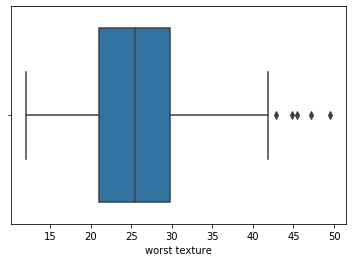

*****************************************************************************************************************************
Feature:  worst perimeter


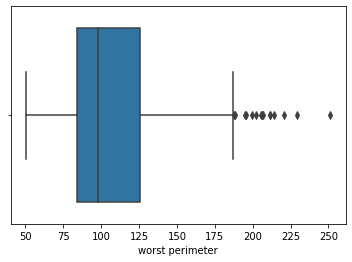

*****************************************************************************************************************************
Feature:  worst area


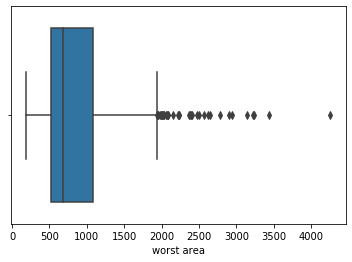

*****************************************************************************************************************************
Feature:  worst smoothness


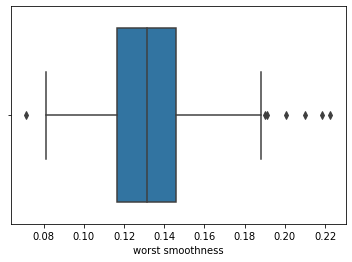

*****************************************************************************************************************************
Feature:  worst compactness


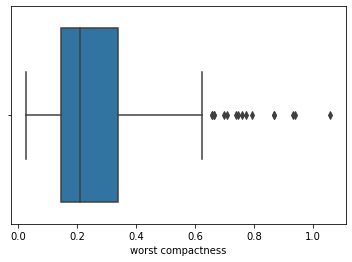

*****************************************************************************************************************************
Feature:  worst concavity


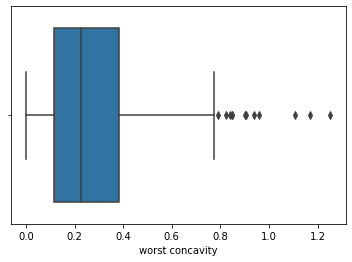

*****************************************************************************************************************************
Feature:  worst concave points


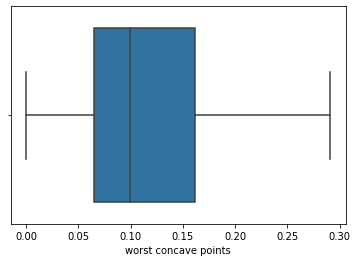

*****************************************************************************************************************************
Feature:  worst symmetry


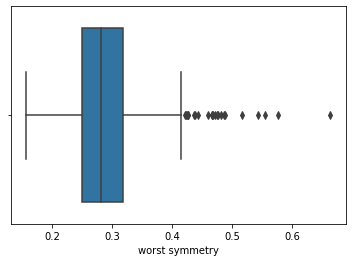

*****************************************************************************************************************************
Feature:  worst fractal dimension


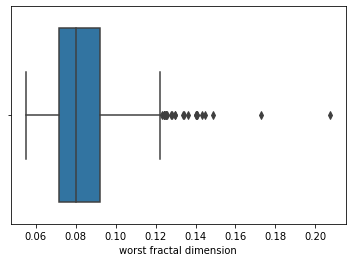

*****************************************************************************************************************************


In [15]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.boxplot(df[col])
        plt.show()
        print("*"*125)

## Distribution Plots

Feature:  mean radius


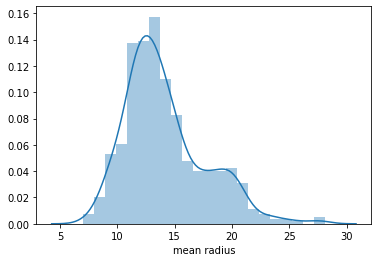

*****************************************************************************************************************************
Feature:  mean texture


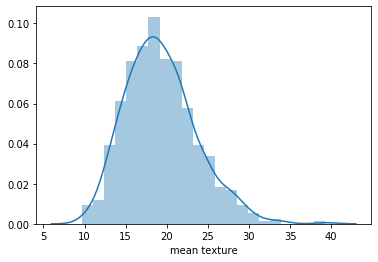

*****************************************************************************************************************************
Feature:  mean perimeter


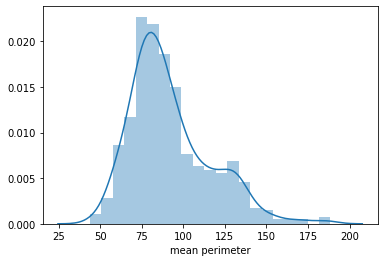

*****************************************************************************************************************************
Feature:  mean area


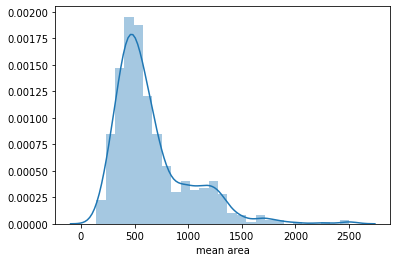

*****************************************************************************************************************************
Feature:  mean smoothness


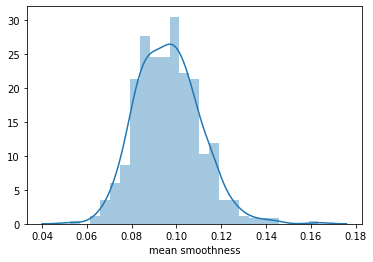

*****************************************************************************************************************************
Feature:  mean compactness


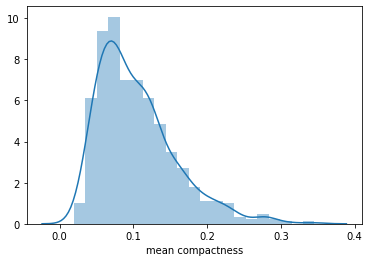

*****************************************************************************************************************************
Feature:  mean concavity


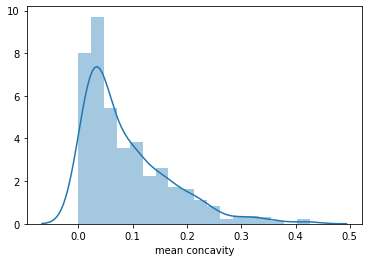

*****************************************************************************************************************************
Feature:  mean concave points


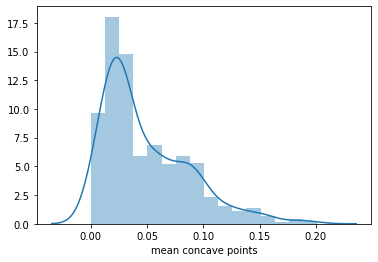

*****************************************************************************************************************************
Feature:  mean symmetry


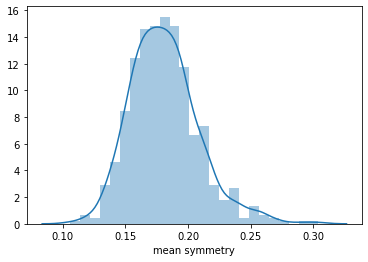

*****************************************************************************************************************************
Feature:  mean fractal dimension


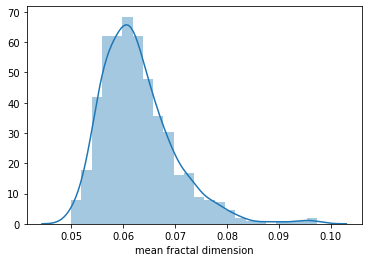

*****************************************************************************************************************************
Feature:  radius error


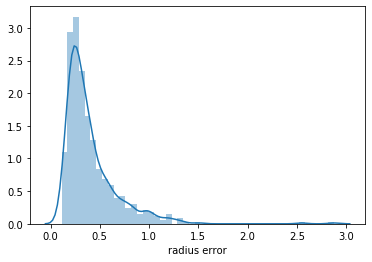

*****************************************************************************************************************************
Feature:  texture error


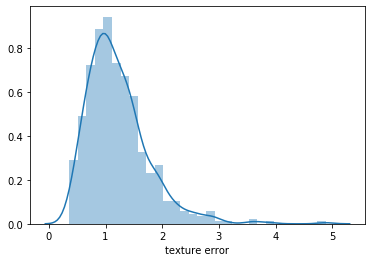

*****************************************************************************************************************************
Feature:  perimeter error


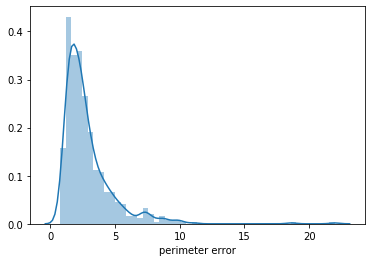

*****************************************************************************************************************************
Feature:  area error


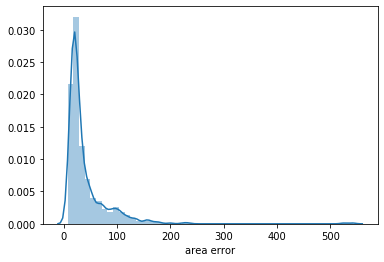

*****************************************************************************************************************************
Feature:  smoothness error


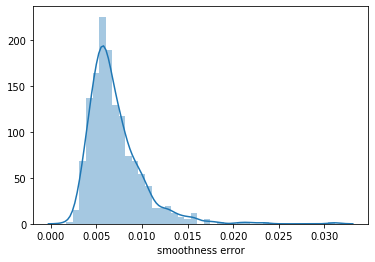

*****************************************************************************************************************************
Feature:  compactness error


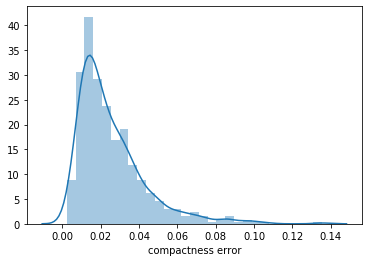

*****************************************************************************************************************************
Feature:  concavity error


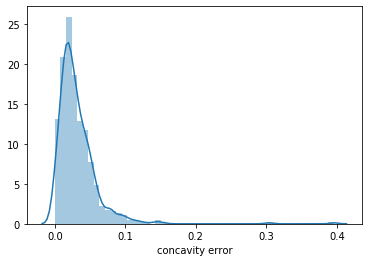

*****************************************************************************************************************************
Feature:  concave points error


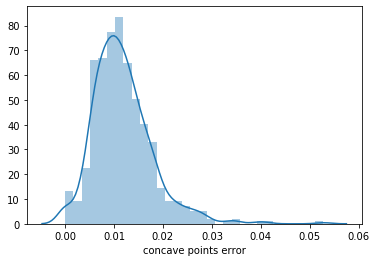

*****************************************************************************************************************************
Feature:  symmetry error


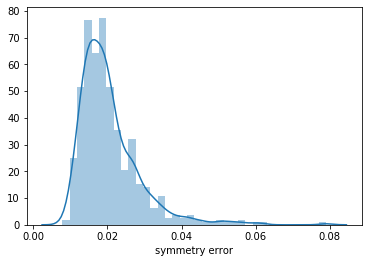

*****************************************************************************************************************************
Feature:  fractal dimension error


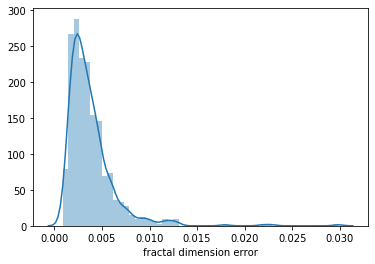

*****************************************************************************************************************************
Feature:  worst radius


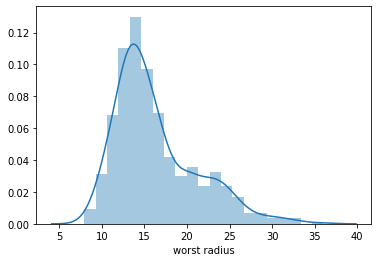

*****************************************************************************************************************************
Feature:  worst texture


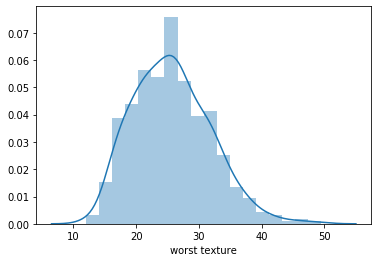

*****************************************************************************************************************************
Feature:  worst perimeter


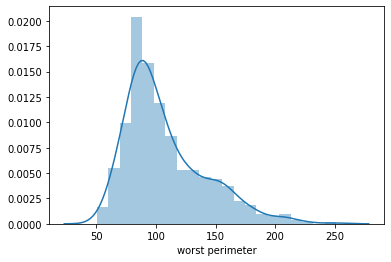

*****************************************************************************************************************************
Feature:  worst area


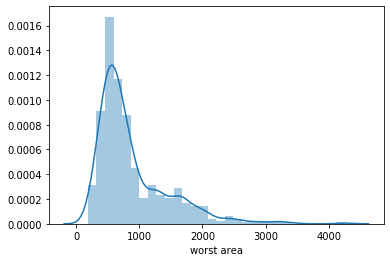

*****************************************************************************************************************************
Feature:  worst smoothness


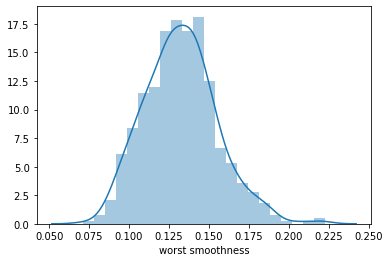

*****************************************************************************************************************************
Feature:  worst compactness


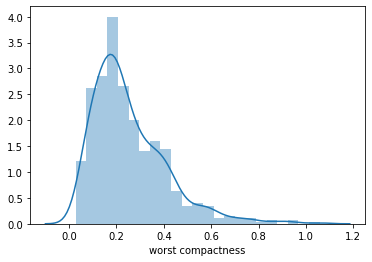

*****************************************************************************************************************************
Feature:  worst concavity


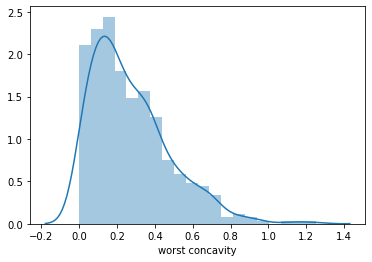

*****************************************************************************************************************************
Feature:  worst concave points


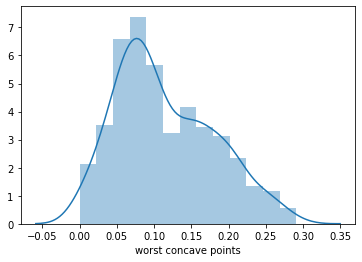

*****************************************************************************************************************************
Feature:  worst symmetry


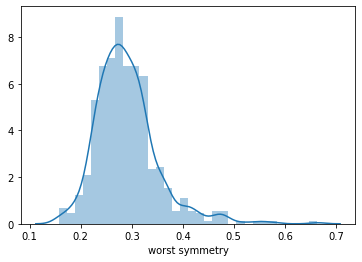

*****************************************************************************************************************************
Feature:  worst fractal dimension


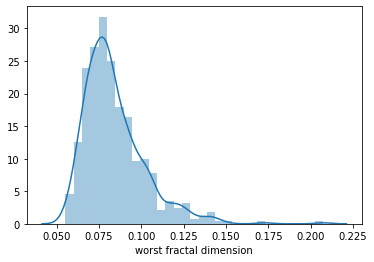

*****************************************************************************************************************************


In [16]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.distplot(df[col])
        plt.show()
        print("*"*125)

## Treating Outliers

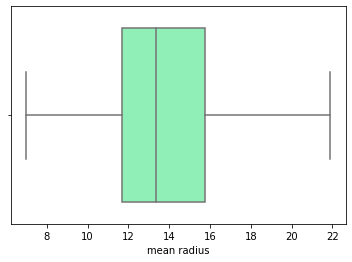

**************************************************************************************************** 




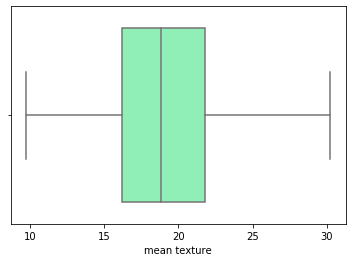

**************************************************************************************************** 




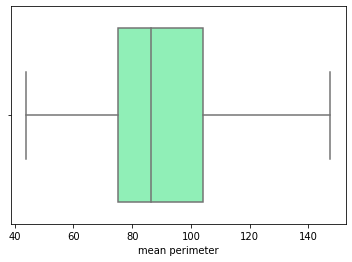

**************************************************************************************************** 




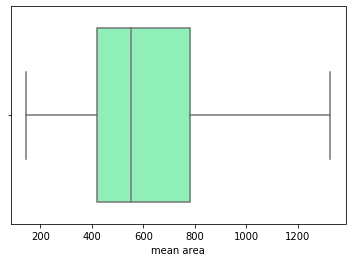

**************************************************************************************************** 




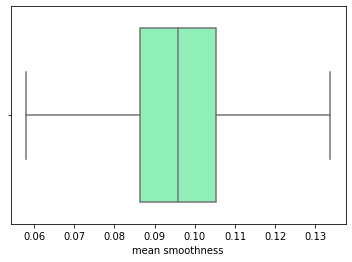

**************************************************************************************************** 




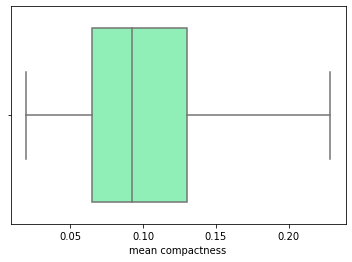

**************************************************************************************************** 




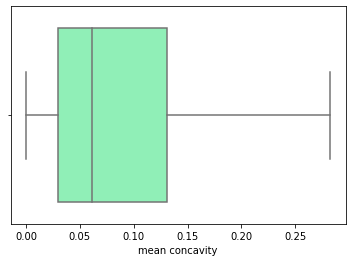

**************************************************************************************************** 




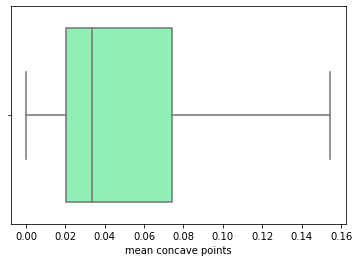

**************************************************************************************************** 




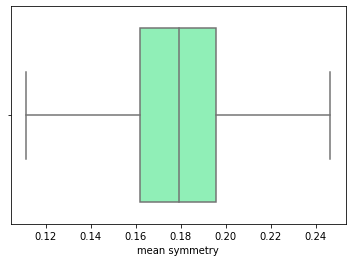

**************************************************************************************************** 




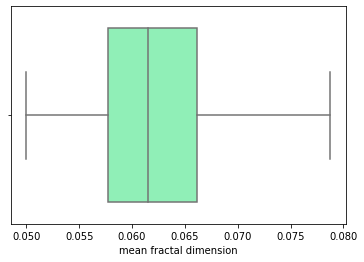

**************************************************************************************************** 




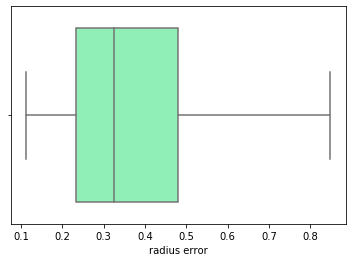

**************************************************************************************************** 




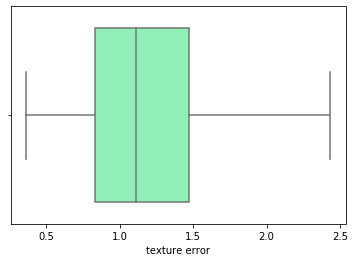

**************************************************************************************************** 




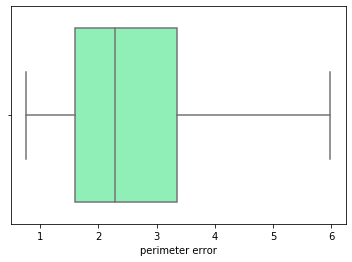

**************************************************************************************************** 




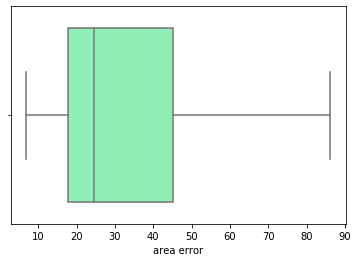

**************************************************************************************************** 




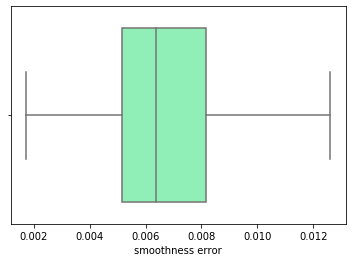

**************************************************************************************************** 




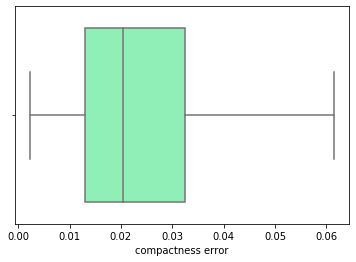

**************************************************************************************************** 




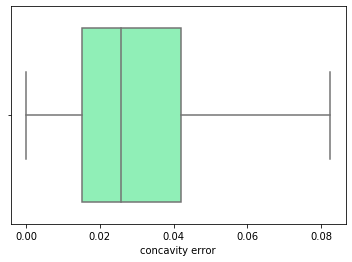

**************************************************************************************************** 




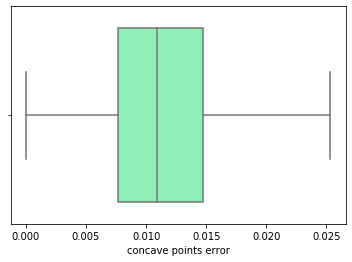

**************************************************************************************************** 




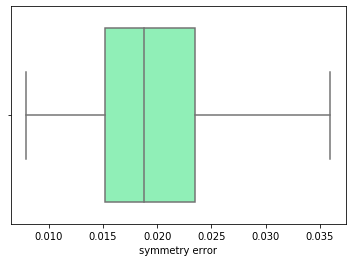

**************************************************************************************************** 




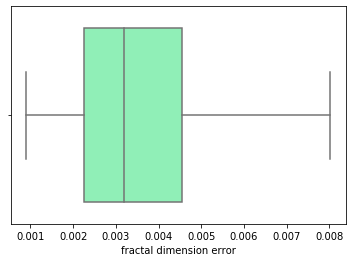

**************************************************************************************************** 




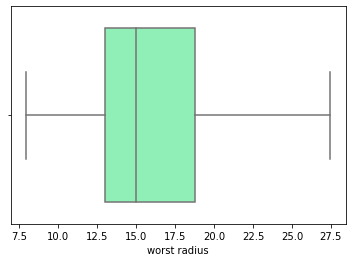

**************************************************************************************************** 




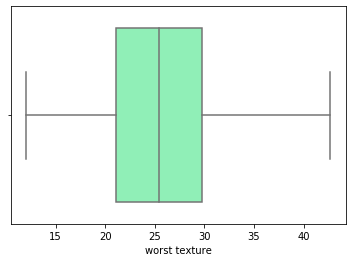

**************************************************************************************************** 




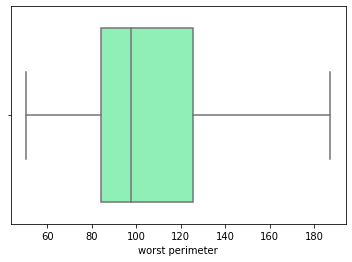

**************************************************************************************************** 




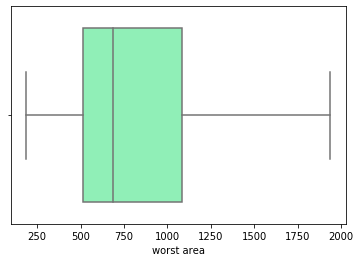

**************************************************************************************************** 




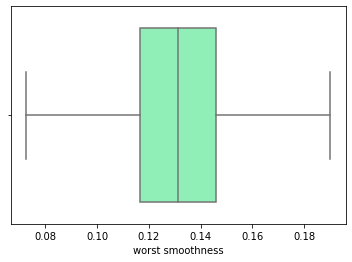

**************************************************************************************************** 




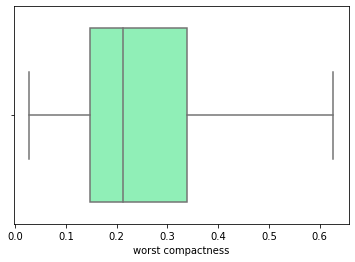

**************************************************************************************************** 




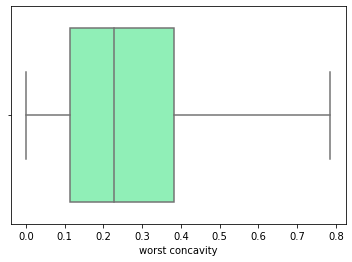

**************************************************************************************************** 




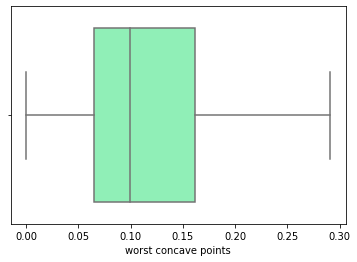

**************************************************************************************************** 




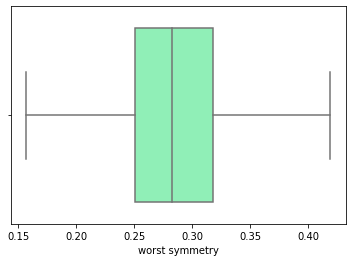

**************************************************************************************************** 




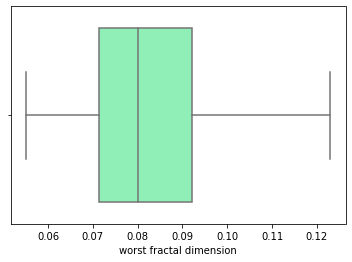

**************************************************************************************************** 




In [17]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

## Checking distribution of target

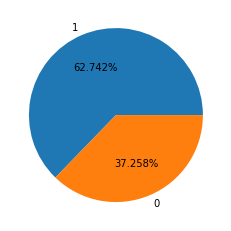

In [18]:
plt.pie(df['cancer'].value_counts(),
               labels = df['cancer'].unique(),
               autopct = '%0.3f%%');



Class Imbalance

# Bivariate Analysis

## Checking Correlation

In [19]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
mean radius,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,-0.319056,0.683660,-0.110023,0.687035,0.832692,-0.278944,0.234053,0.327152,0.422631,-0.173992,-0.008658,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799,0.745217
mean texture,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,-0.065946,0.327560,0.413346,0.341939,0.357392,0.020116,0.220249,0.235813,0.182780,0.000368,0.110895,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049,0.419123
mean perimeter,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,-0.266586,0.696934,-0.099647,0.705934,0.840760,-0.257509,0.281713,0.368255,0.455689,-0.154043,0.036179,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825,0.759006
mean area,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,-0.303524,0.712001,-0.086600,0.712171,0.857245,-0.242369,0.239557,0.333751,0.423980,-0.150152,0.008509,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012,0.752786
mean smoothness,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,0.586706,0.319067,0.095841,0.320742,0.284203,0.348727,0.344675,0.311431,0.415558,0.158139,0.375970,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675,0.366931
mean compactness,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,0.557003,0.528689,0.044654,0.583427,0.542559,0.123382,0.780394,0.723896,0.693073,0.144096,0.619414,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169,0.608494
mean concavity,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,0.325513,0.641539,0.069178,0.682717,0.689730,0.076033,0.697114,0.771742,0.706172,0.095482,0.501686,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332,0.727168
mean concave points,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,0.170028,0.729187,0.024127,0.753484,0.799938,0.013705,0.533459,0.584701,0.669339,0.034775,0.338782,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626,0.788099
mean symmetry,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,0.471760,0.344226,0.145508,0.347979,0.293160,0.211799,0.425863,0.369554,0.387573,0.404763,0.397882,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494,0.334536
mean fractal dimension,-0.319056,-0.065946,-0.266586,-0.303524,0.586706,0.557003,0.325513,0.170028,0.471760,1.000000,0.006154,0.173025,0.044862,-0.104908,0.418539,0.549193,0.416011,0.311171,0.316950,0.717762,-0.252727,-0.037384,-0.202961,-0.235192,0.505984,0.456164,0.335359,0.178397,0.323400,0.776915,-0.006801


In [20]:
## Since there are a large number of values, we can apply a threshold of:
## Values having correlaation with target > 0.60 and
## Values having correlation wiht target < -0.60

correlation = df.corr()
x = correlation.cancer[(correlation.cancer > 0.60) | (correlation.cancer < -0.60)]
x

mean radius             0.745217
mean perimeter          0.759006
mean area               0.752786
mean compactness        0.608494
mean concavity          0.727168
mean concave points     0.788099
radius error            0.642399
perimeter error         0.646875
area error              0.739068
worst radius            0.793938
worst perimeter         0.800618
worst area              0.794640
worst compactness       0.611083
worst concavity         0.683565
worst concave points    0.793566
cancer                  1.000000
Name: cancer, dtype: float64

In [21]:
x.index

Index(['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'cancer'], dtype='object')

## Creating a dataframe filtered as per threshold values

In [22]:
X = df[x.index]
X = X.drop('cancer', 1)
y = df['cancer']
X.head()

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.22862,0.28241,0.14710,0.84865,5.9835,86.20,25.38,184.60,1937.05,0.62695,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.54350,3.3980,74.08,24.99,158.80,1937.05,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.74560,4.5850,86.20,23.57,152.50,1709.00,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.22862,0.24140,0.10520,0.49560,3.4450,27.23,14.91,98.87,567.70,0.62695,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.75720,5.4380,86.20,22.54,152.20,1575.00,0.20500,0.4000,0.1625


## Scaling

In [23]:
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X[0]

array([0.73791809, 0.76187262, 0.72497464, 1.        , 1.        ,
       0.95188792, 1.        , 1.        , 1.        , 0.89349718,
       0.98002556, 1.        , 1.        , 0.90630172, 0.91202749])

## Multicollinearity

In [24]:
h = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(h)


[8033.696865670215, 8894.611451438812, 822.4338965204263, 64.0526969455475, 96.22457695458715, 95.78211081612787, 141.8996089783045, 93.48852103949169, 132.55918845672227, 2190.0698744169413, 1246.1573545464933, 785.237266954168, 57.5658604627274, 75.52075469963079, 75.86382033316292]


Extremely high VIF scores

# Model Making

In [25]:
## Splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [26]:
## Using Support Vector Machine

model = SVC()
model.fit(X_train, y_train)

SVC()

In [27]:
## Applying on Test data

y_test_pred = model.predict(X_test)
y_test_pred[:15]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
## Checking reports

print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_test_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
cm

Accuracy_score Testing Data:  93.57

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.93      0.89      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



array([[104,   4],
       [  7,  56]], dtype=int64)

In [29]:
## Applying on training data

y_train_pred = model.predict(X_train)
y_train_pred[:15]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [30]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))
print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy_score Training Data:  95.23

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       249
           1       0.97      0.90      0.93       149

    accuracy                           0.95       398
   macro avg       0.96      0.94      0.95       398
weighted avg       0.95      0.95      0.95       398



array([[245,   4],
       [ 15, 134]], dtype=int64)

# Grid Search CV

In [32]:
param_grid = {'C' : [10,20,30,100,150,200,250,300,350,400,450,500,550,600,650,700.750,800,900,1000],
             'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 1.2, 1.5, 1.7, 1.9,2],
             'kernel' : ['rbf','linear'] }

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid = GridSearchCV(SVC(),
                    param_grid,
                    verbose = 10,
                    cv = 5)

In [36]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.937, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.924, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.950, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ...... C=10, gamma=0.2, kernel=linear, score=0.963, total=   0.0s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ...... C=10, gamma=0.2, kernel=linear, score=0.962, total=   0.0s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ...... C=10, gamma=0.2, kernel=linear, score=0.962, total=   0.0s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.3, kernel=rbf, score=0.950, total=   0.0s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.3, kernel=rbf, score=0.925, total=   0.0s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.3, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.3, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.3, kernel=rbf, score=0.949, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 2850 out of 2850 | elapsed:   38.0s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 20, 30, 100, 150, 200, 250, 300, 350, 400,
                               450, 500, 550, 600, 650, 700.75, 800, 900,
                               1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 1.2, 1.5, 1.7, 1.9, 2],
                         'kernel': ['rbf', 'linear']},
             verbose=10)

In [39]:
display(grid.best_params_,
       grid.best_score_)

{'C': 150, 'gamma': 0.1, 'kernel': 'rbf'}

0.9573101265822785

In [40]:
grid_predictions = grid.predict(X_test)
grid_predictions

In [42]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, grid_predictions)*100,2))
print('\n','Classification_report Testing Data: ','\n','\n',classification_report(y_test, grid_predictions))
cm = confusion_matrix(y_test, grid_predictions)
cm

Accuracy_score Testing Data:  95.32

 Classification_report Testing Data:  
 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



array([[104,   4],
       [  4,  59]], dtype=int64)

### Changing Parameters

In [46]:
param_grid2 = {'C': [ 10, 150, 200,350, 400, 500, 550, 600, 650,700,750, 100, 800,1000,1500, 2000],
'gamma': [ 0.1, 0.2, 0.5, 0.9, 1, 0.01, 0.8, 0.7, 1.2, 0.6 , 1.3]}

In [47]:
grid2 = GridSearchCV(SVC(),
                    param_grid2,
                    verbose = 10,
                    cv = 8)

In [48]:
grid2.fit(X_train, y_train)

Fitting 8 folds for each of 176 candidates, totalling 1408 fits
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.920, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.940, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.940, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.940, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.960, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.940, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.5 .................................................
[CV] ..................... C=10, gamma=0.5, score=0.980, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ..................... C=10, gamma=0.5, score=0.980, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ..................... C=10, gamma=0.5, score=0.959, total=   0.0s
[CV] C=10, gamma=0.5 .................................................
[CV] ..................... C=10, gamma=0.5, score=0.878, total=   0.0s
[CV] C=10, gamma=0.9 .................................................
[CV] ..................... C=10, gamma=0.9, score=0.960, total=   0.0s
[CV] C=10, gamma=0.9 .................................................
[CV] ..................... C=10, gamma=0.9, score=0.900, total=   0.0s
[CV] C=10, gamma=0.9 .................................................
[CV] ..................... C=10, gamma=0.9, score=0.960, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 1408 out of 1408 | elapsed:   17.4s finished


GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [10, 150, 200, 350, 400, 500, 550, 600, 650, 700,
                               750, 100, 800, 1000, 1500, 2000],
                         'gamma': [0.1, 0.2, 0.5, 0.9, 1, 0.01, 0.8, 0.7, 1.2,
                                   0.6, 1.3]},
             verbose=10)

In [49]:
display(grid2.best_params_,
       grid2.best_score_)

{'C': 10, 'gamma': 1.3}

0.9546428571428571

In [50]:
grid_predictions2 = grid2.predict(X_test)
grid_predictions2

In [51]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, grid_predictions2)*100,2))
print('\n','Classification_report Testing Data: ','\n','\n',classification_report(y_test, grid_predictions2))
cm = confusion_matrix(y_test, grid_predictions2)
cm

Accuracy_score Testing Data:  95.91

 Classification_report Testing Data:  
 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



array([[104,   4],
       [  3,  60]], dtype=int64)